# 21. 아파트이름

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import gc
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [91]:
df = pd.read_csv('../data/preprocessed/20_ratio_sale_deposit.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_51041/198579563.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/20_ratio_sale_deposit.csv')


In [92]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322


In [93]:
len(df['아파트명'].unique())

6550

In [94]:
df['아파트명'].fillna('모름', inplace=True)

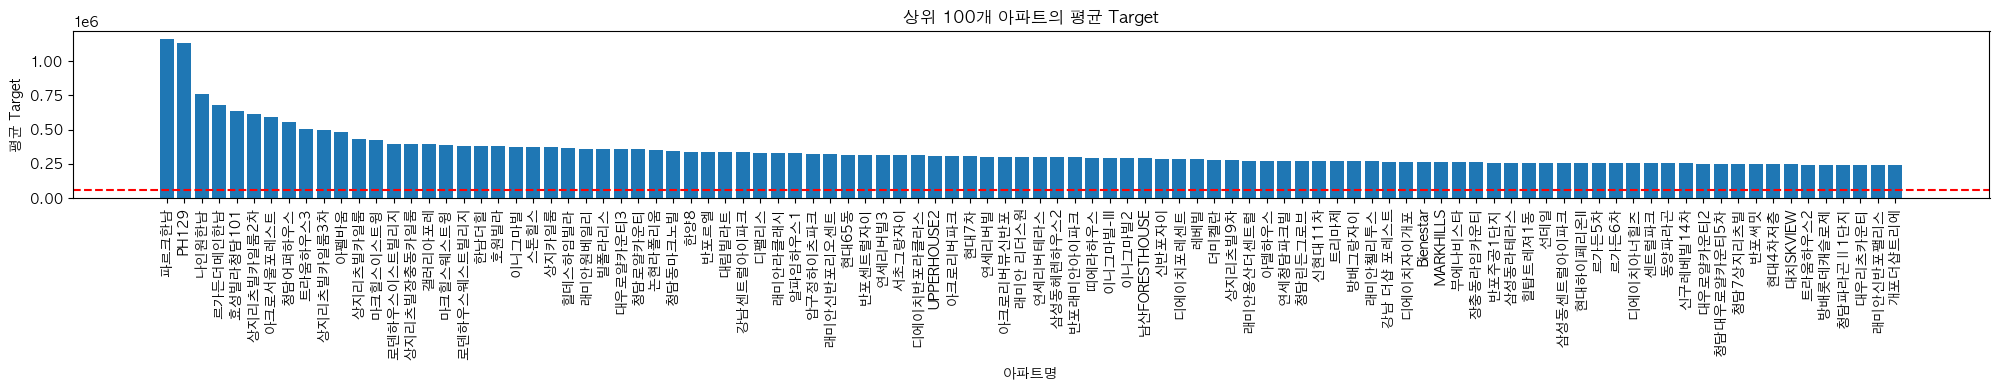

In [95]:
average_target_by_apartment = df.groupby('아파트명')['target'].mean().reset_index()
average_target_by_apartment = average_target_by_apartment.sort_values(by='target', ascending=False)

# 상위 100개 '아파트명' 추출
top_100_apartments = average_target_by_apartment.head(100)

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.bar(top_100_apartments['아파트명'], top_100_apartments['target'])
plt.xlabel('아파트명')
plt.ylabel('평균 Target')
plt.title('상위 100개 아파트의 평균 Target')
plt.xticks(rotation=90)  # x 축 레이블 회전
plt.tight_layout()
plt.axhline(y=average_target_by_apartment['target'].mean(), color='red', linestyle='--')
plt.show()

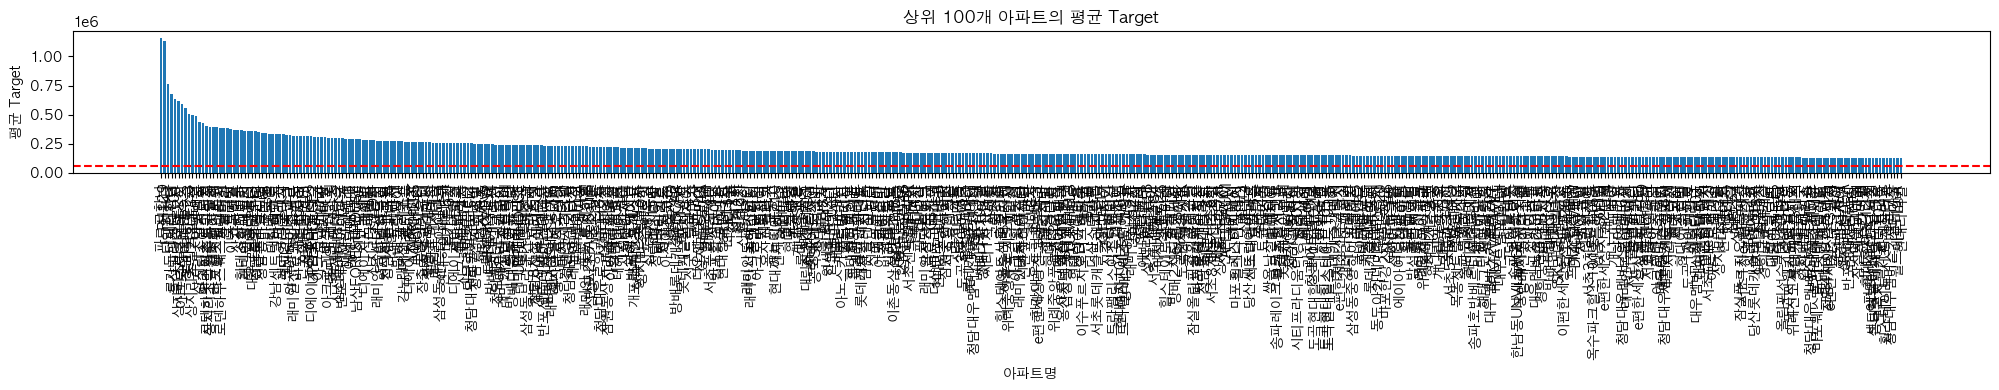

In [96]:
# 하위 100개 '아파트명' 추출
top_100_apartments = average_target_by_apartment.iloc[:500]

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.bar(top_100_apartments['아파트명'], top_100_apartments['target'])
plt.xlabel('아파트명')
plt.ylabel('평균 Target')
plt.title('상위 100개 아파트의 평균 Target')
plt.xticks(rotation=90)  # x 축 레이블 회전
plt.tight_layout()
plt.axhline(y=average_target_by_apartment['target'].mean(), color='red', linestyle='--')
plt.show()

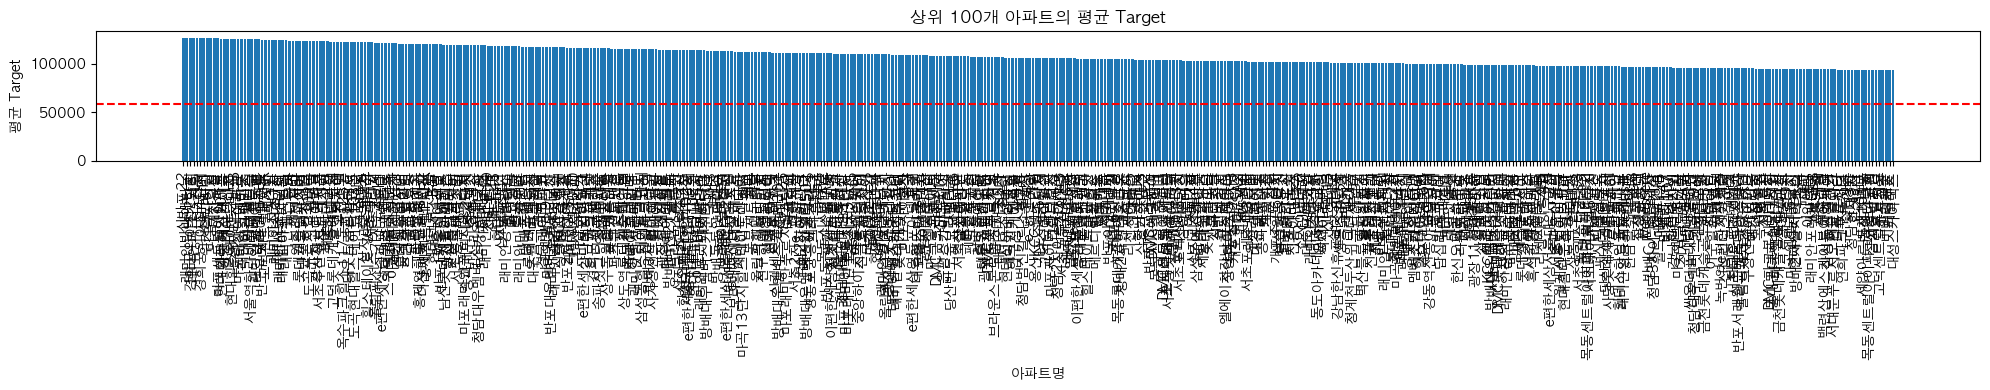

In [97]:
# 하위 100개 '아파트명' 추출
top_100_apartments = average_target_by_apartment.iloc[500:1000]

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.bar(top_100_apartments['아파트명'], top_100_apartments['target'])
plt.xlabel('아파트명')
plt.ylabel('평균 Target')
plt.title('상위 100개 아파트의 평균 Target')
plt.xticks(rotation=90)  # x 축 레이블 회전
plt.tight_layout()
plt.axhline(y=average_target_by_apartment['target'].mean(), color='red', linestyle='--')
plt.show()

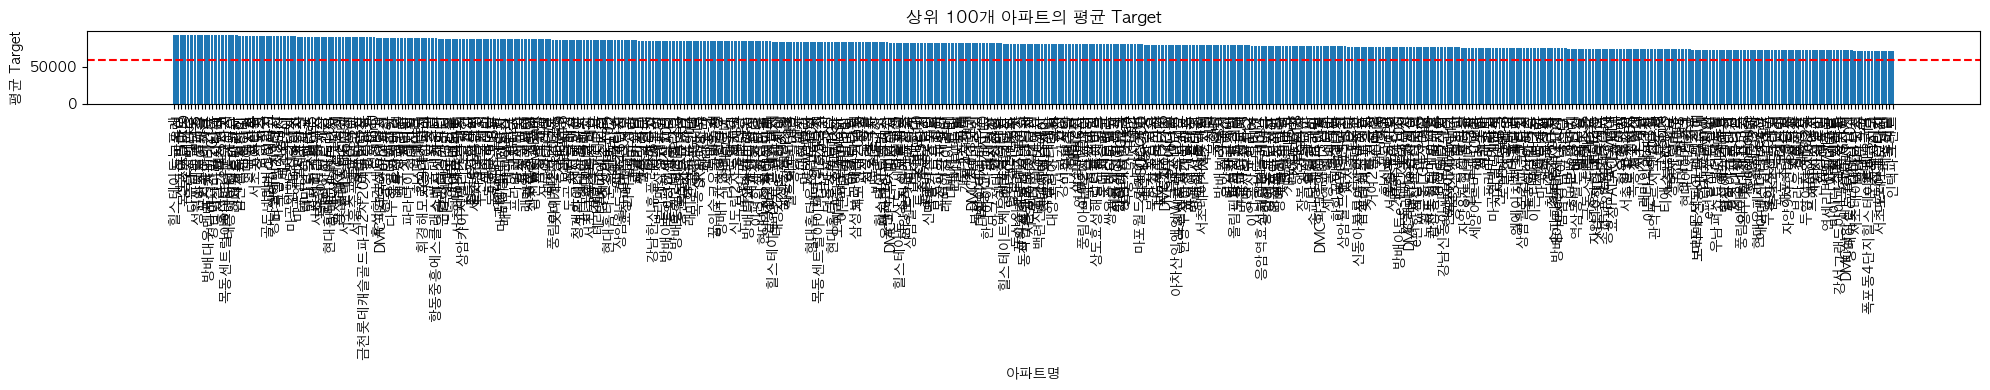

In [98]:
# 하위 100개 '아파트명' 추출
top_100_apartments = average_target_by_apartment.iloc[1000:1500]

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.bar(top_100_apartments['아파트명'], top_100_apartments['target'])
plt.xlabel('아파트명')
plt.ylabel('평균 Target')
plt.title('상위 100개 아파트의 평균 Target')
plt.xticks(rotation=90)  # x 축 레이블 회전
plt.tight_layout()
plt.axhline(y=average_target_by_apartment['target'].mean(), color='red', linestyle='--')
plt.show()

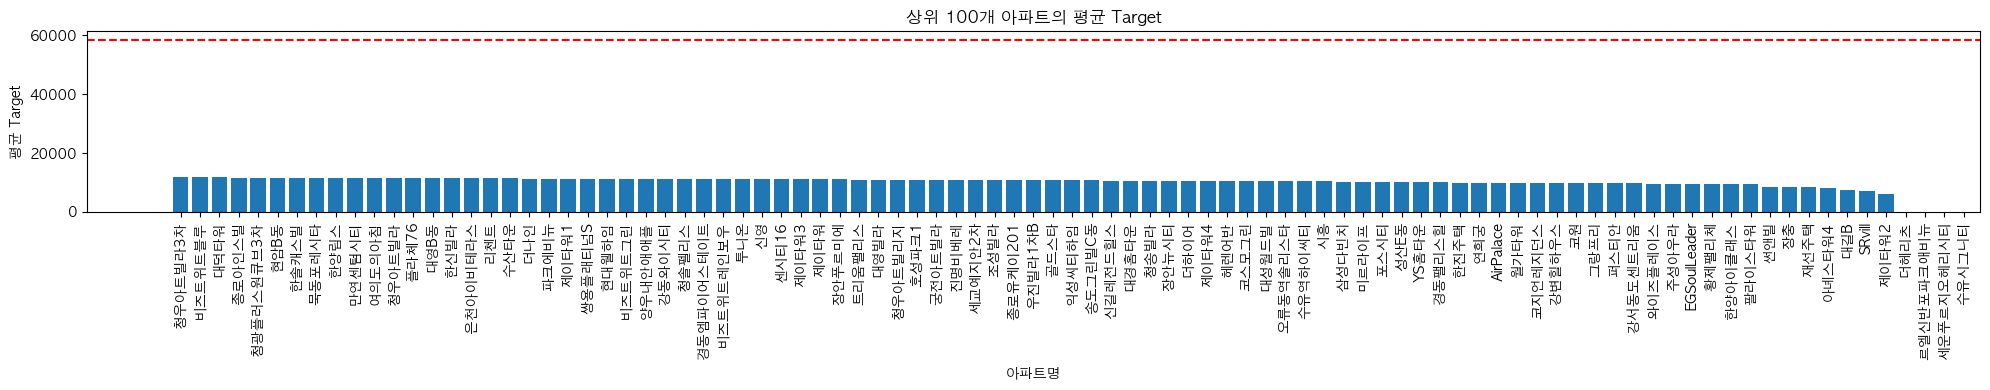

In [99]:
# 하위 100개 '아파트명' 추출
top_100_apartments = average_target_by_apartment.tail(100)

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.bar(top_100_apartments['아파트명'], top_100_apartments['target'])
plt.xlabel('아파트명')
plt.ylabel('평균 Target')
plt.title('상위 100개 아파트의 평균 Target')
plt.xticks(rotation=90)  # x 축 레이블 회전
plt.tight_layout()
plt.axhline(y=average_target_by_apartment['target'].mean(), color='red', linestyle='--')
plt.show()

In [100]:
df[df['아파트명'].str.contains('한남')]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율
63215,서울특별시 성동구 옥수동,220-1,220.0,1.0,한남하이츠,89.190,201710,12,10,1982,...,옥수동,79.061,3.147130e+06,85.3,35,1,50.544722,16.377676,0.735356,70.879100
63216,서울특별시 성동구 옥수동,220-1,220.0,1.0,한남하이츠,177.120,201710,13,6,1982,...,옥수동,79.061,3.147130e+06,85.3,35,1,50.544722,16.377676,0.735356,70.879100
63217,서울특별시 성동구 옥수동,220-1,220.0,1.0,한남하이츠,149.390,201710,13,12,1982,...,옥수동,79.061,3.147130e+06,85.3,35,1,50.544722,16.377676,0.735356,70.879100
63218,서울특별시 성동구 옥수동,220-1,220.0,1.0,한남하이츠,177.120,201710,17,7,1982,...,옥수동,79.061,3.147130e+06,85.3,35,1,50.544722,16.377676,0.735356,70.879100
63219,서울특별시 성동구 옥수동,220-1,220.0,1.0,한남하이츠,149.390,201710,19,14,1982,...,옥수동,79.061,3.147130e+06,85.3,35,1,50.544722,16.377676,0.735356,70.879100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127108,서울특별시 용산구 한남동,807,807.0,0.0,한남힐스테이트,84.785,202307,29,7,2003,...,한남동,98.881,6.749489e+06,38.0,20,0,45.212818,12.462049,-0.531937,50.938744
1127412,서울특별시 용산구 한남동,386,386.0,0.0,르가든더메인한남,237.520,202307,7,3,2019,...,한남동,98.881,6.749489e+06,38.0,4,0,45.212818,12.462049,-0.531937,50.938744
1127413,서울특별시 용산구 한남동,386,386.0,0.0,르가든더메인한남,239.670,202307,21,4,2019,...,한남동,98.881,6.749489e+06,38.0,4,0,45.212818,12.462049,-0.531937,50.938744
1127415,서울특별시 용산구 한남동,410,410.0,0.0,파르크한남,268.670,202308,17,4,2020,...,한남동,99.039,6.749489e+06,46.0,3,0,45.056635,13.703570,-0.120261,50.991003


In [101]:
# 아파트명에서 키워드를 찾아 카테고리 열 생성
categories = ['더퍼스트', '센트럴', '파크', '포레', '메트로', '에듀', '시티']

In [102]:
for category in categories:
    df[category] = df['아파트명'].str.contains(category)

In [103]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,더퍼스트,센트럴,파크,포레,메트로,에듀,시티
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,17.693929,1.243615,70.059000,False,False,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,17.693929,1.243615,70.059000,False,False,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,17.693929,1.243615,70.059000,False,False,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,27.764117,2.459291,69.322000,False,False,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,27.764117,2.459291,69.322000,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,12.462049,-0.641286,50.938744,False,False,False,False,False,False,False
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,12.462049,-0.641286,50.938744,False,False,False,False,False,False,False
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,13.703570,-0.607676,50.991003,False,False,False,False,False,False,False
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,17.287617,-0.225827,51.082553,False,False,False,False,False,False,False


In [104]:
# '리버'와 '레이크'를 하나의 카테고리 '리버레이크'로 보기
df['리버 or 레이크'] = df['아파트명'].str.contains('리버|레이크')

In [105]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,더퍼스트,센트럴,파크,포레,메트로,에듀,시티,리버 or 레이크
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1.243615,70.059000,False,False,False,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1.243615,70.059000,False,False,False,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1.243615,70.059000,False,False,False,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.459291,69.322000,False,False,False,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.459291,69.322000,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,-0.641286,50.938744,False,False,False,False,False,False,False,False
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,-0.641286,50.938744,False,False,False,False,False,False,False,False
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,-0.607676,50.991003,False,False,False,False,False,False,False,False
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,-0.225827,51.082553,False,False,False,False,False,False,False,False


In [106]:
# '기타' 카테고리 열 생성
df['기타'] = ~df[categories + ['리버 or 레이크']].any(axis=1)

In [107]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매 대비 전세가격 비율,더퍼스트,센트럴,파크,포레,메트로,에듀,시티,리버 or 레이크,기타
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,70.059000,False,False,False,False,False,False,False,False,True
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,70.059000,False,False,False,False,False,False,False,False,True
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,70.059000,False,False,False,False,False,False,False,False,True
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,69.322000,False,False,False,False,False,False,False,False,True
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,69.322000,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,50.938744,False,False,False,False,False,False,False,False,True
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,50.938744,False,False,False,False,False,False,False,False,True
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,50.991003,False,False,False,False,False,False,False,False,True
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,51.082553,False,False,False,False,False,False,False,False,True


In [108]:
# '카테고리' 열을 범주형으로 변환
df['아파트 카테고리'] = df[categories + ['리버 or 레이크', '기타']].idxmax(axis=1)

In [109]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,더퍼스트,센트럴,파크,포레,메트로,에듀,시티,리버 or 레이크,기타,아파트 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,True,기타
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,True,기타
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,True,기타
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,True,기타
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,True,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,False,False,False,False,False,False,False,False,True,기타
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,False,False,False,False,False,False,False,False,True,기타
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,False,False,False,False,False,False,False,False,True,기타
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,False,False,False,False,False,False,False,False,True,기타


In [110]:
# 카테고리별 평균 실거래가 계산
category_mean_target = df.groupby('아파트 카테고리')['target'].mean().reset_index()
category_mean_target = category_mean_target.rename(columns={'target': '평균 실거래가'})

In [111]:
category_mean_target

,아파트 카테고리,평균 실거래가
0,기타,56650.223323
1,더퍼스트,78270.406504
2,리버 or 레이크,84970.286950
3,메트로,34670.920635
4,센트럴,93529.680190
5,시티,57844.503143
6,에듀,81311.315789
7,파크,75491.250991
8,포레,94839.497214


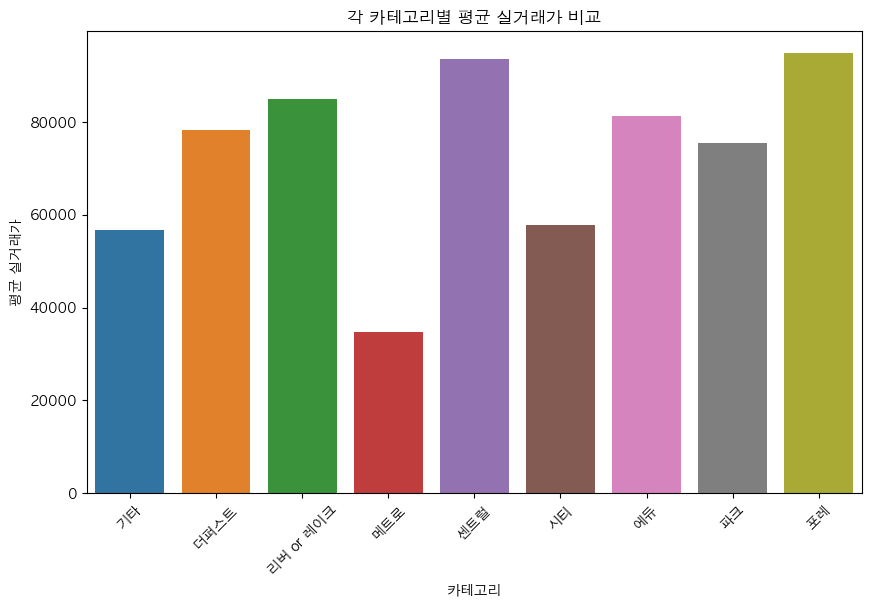

In [112]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='아파트 카테고리', y='평균 실거래가', data=category_mean_target)
plt.title('각 카테고리별 평균 실거래가 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 실거래가')
plt.xticks(rotation=45)
plt.show()

columns_to_drop = categories + ['리버 or 레이크', '기타']

In [116]:
columns_to_drop = categories + ['리버 or 레이크', '기타']
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['더퍼스트', '센트럴', '파크', '포레', '메트로', '에듀', '시티', '리버 or 레이크', '기타'] not found in axis"

In [117]:
df['아파트 카테고리']

0          기타
1          기타
2          기타
3          기타
4          기타
           ..
1128089    기타
1128090    기타
1128091    기타
1128092    기타
1128093    기타
Name: 아파트 카테고리, Length: 1128094, dtype: object

In [118]:
df['아파트 카테고리'].astype('category')

0          기타
1          기타
2          기타
3          기타
4          기타
           ..
1128089    기타
1128090    기타
1128091    기타
1128092    기타
1128093    기타
Name: 아파트 카테고리, Length: 1128094, dtype: category
Categories (9, object): ['기타', '더퍼스트', '리버 or 레이크', '메트로', ..., '시티', '에듀', '파크', '포레']

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 94 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   시군구                   1128094 non-null  object 
 1   번지                    1127867 non-null  object 
 2   본번                    1128019 non-null  float64
 3   부번                    1128019 non-null  float64
 4   아파트명                  1128094 non-null  object 
 5   전용면적                  1128094 non-null  float64
 6   계약년월                  1128094 non-null  int64  
 7   계약일                   1128094 non-null  int64  
 8   층                     1128094 non-null  int64  
 9   건축년도                  1128094 non-null  int64  
 10  도로명                   1128094 non-null  object 
 11  해제사유발생일               6195 non-null     float64
 12  등기신청일자                1128094 non-null  object 
 13  거래유형                  1128094 non-null  object 
 14  중개사소재지                1128094 non-

In [120]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322000,기타
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322000,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286,50.938744,기타
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286,50.938744,기타
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,99.123,2.963517e+06,46.0,9,0,45.056635,13.703570,-0.607676,50.991003,기타
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,99.328,2.963517e+06,41.4,9,0,44.744578,17.287617,-0.225827,51.082553,기타


In [121]:
df.to_csv('../data/preprocessed/21_apart_name.csv', index=False)